# Configurations

In [1]:
import os
from os.path import join
import tqdm

import numpy as np
import pandas as pd
from pandas import DataFrame as dataframe

import matplotlib.pyplot as plt

!export PYTHONPATH="/home/hendrio/amex-1M/:$PYTHONPATH"
!export PYTHONPATH="/home/hendrio/amex-1M/src/:$PYTHONPATH"


In [2]:
# root_dir ="/"
base_dir = join('/', 'home', 'hendrio', 'amex-1M')
paths = {
    # 'root':root_dir,
    'base': base_dir,
    'processed': join(base_dir, 'data', 'processed'),
    'temp': join(base_dir, 'data', 'temp'),
    'amex': join(base_dir, 'data', 'processed', 'amex-1M_binary-dataset-[intents-permissions-apicalls].npz'),

}

In [3]:
amex_dict = np.load(paths['amex'])

print(amex_dict.keys())

KeysView(NpzFile '/home/hendrio/amex-1M/data/processed/amex-1M_binary-dataset-[intents-permissions-apicalls].npz' with keys: data, sha256, feature_names, metadata, metadata_feature_names)


# Load Amex dataset

In [4]:
def load_amex_1m(path, file_name='amex-1M_binary-dataset-[intents-permissions-apicalls].npz'):
    data_dict = np.load(join(path, file_name), allow_pickle=True)
    metadata = dataframe(data_dict['metadata'], columns=data_dict['metadata_feature_names'])
    
    columns_names = data_dict['feature_names']
    sha256 = data_dict['sha256']

    print(data_dict['data'].shape)

    return data_dict['data'], metadata, columns_names, sha256



def create_class(df, threshold):
    return np.asarray([1 if i>=threshold else 0 for i in df ])

In [5]:
data, metadata, columns_names, sha256 = load_amex_1m(
    path=paths['processed'], 
    file_name='amex-1M_binary-dataset-[intents-permissions-apicalls].npz'
    )

(1340515, 22810)


In [6]:
metadata['CLASS'] = create_class(df=metadata['VT_SCANNERS_MALICIOUS'], threshold=4)
metadata['CLASS'].value_counts()

CLASS
0    1221421
1     119094
Name: count, dtype: int64

In [7]:
metadata

,SHA256,VT_LAST_ANALYSIS_DATE,VT_SIZE,VT_MD5,VT_TIMES_SUBMITTED,VT_SCANNERS_FAILURE,VT_SCANNERS_MALICIOUS,VT_SCANNERS_UNDETECTED,VT_SCANNERS_SUGGESTED_THREAT_LABEL,VT_SCANNERS_NAMES,year,CLASS
0,FF739CB6B744C3A19108694DFC920C839CE2E2CB66BFE6...,2023-09-08 22:25:46,10607603.0,23765837b4a01b2abec4ae80d7176070,1,0,0,64,NaN,[],2023,0
1,FF739DC276AAC3EEA52D0270B0BB2D7BA51778A75FAB44...,2023-09-13 03:19:34,17010805.0,62fb9bb510133dc2905da82ff4d9c431,1,0,0,63,NaN,[],2023,0
2,FF739E1EC582AA85E591BB84427847A2B7BA1B98469396...,2023-09-12 11:03:51,4526249.0,307dfec3ed79cd4060ac4606e6416bf2,2,0,0,64,NaN,[],2023,0
3,FF739EAC59AD8C4D43B9AFC0B56D661447F2FA4861D8DC...,2023-08-14 15:49:57,70524.0,fbc3e3afe1e30ed36a194d57bef307d7,6,0,0,60,NaN,[],2023,0
4,FF739EEEE25B0670CE6739B91A3558213DD12764A6EC48...,2023-09-13 20:34:08,9612432.0,5b01afecff200574b6cb9c30cc7fd713,1,0,0,65,NaN,[],2023,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1340510,F1ECC4473B1E3418D07FB8FAEFCA3DC9696C2B4FFE1840...,2023-11-15 12:59:27,84084778.0,d6e0a3cd3b8041d39e8db47b6f3e650c,1,0,0,64,NaN,[],2023,0
1340511,F1ECC45CFDA505F80B1FFF0CA064A0D54BCEA9064A98F9...,2023-03-11 06:57:54,17672917.0,64504f449a8fbdc9c4387db1e44238f0,1,0,0,63,NaN,[],2023,0
1340512,F1ECC46B74AEAEA38E1A002D0E21194CAB1EB2AC889133...,2023-05-23 18:47:24,16616032.0,fe793d4a66ba9945d99c395433c161ad,2,0,2,63,NaN,"['Lionic', 'SymantecMobileInsight']",2023,0
1340513,F1ECC4A96FAB6082949C2F22048813B01F36F8D6ADB0A6...,2023-11-15 12:59:46,1195619.0,ff6c4160214ca43fd684db68730f6b8c,1,1,0,64,NaN,[],2023,0


## Visualization

In [42]:
def plot_pie_distribution(labels, classes=['Benign', 'Malware'], title='distribution', path_save=None):
    values, counts = np.unique(labels, return_counts=True)
    print(values)
    print(counts)

    # Create a DataFrame from the values and counts
    df_counts = pd.DataFrame({'Class':classes, 'Count': counts})

    def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return f'{val} ({pct:.1f}%)'
        return my_format

    # Create a pie plot
    ax = df_counts.set_index('Class').plot.pie(
        y='Count',
        autopct=autopct_format(counts),
        figsize=(4, 4)
    )

    plt.ylabel('')  # Remove y-label for better presentation
    plt.title(title)
    

    if path_save is not None:
        plt.savefig(join(path_save, f'{title}.pdf'), format='pdf', dpi=96, bbox_inches='tight')
        plt.savefig(join(path_save, f'{title}.png'), format='png', dpi=128, bbox_inches='tight')

    plt.show()
    
    return 

[0 1]
[1221421  119094]


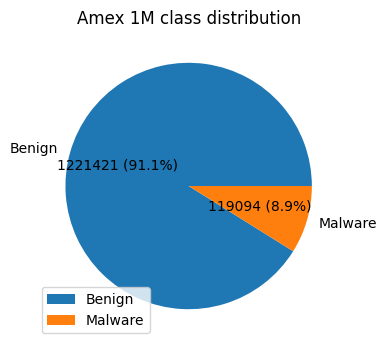

In [43]:
plot_pie_distribution(
    labels=metadata['CLASS'].values, 
    classes=['Benign', 'Malware'], 
    title='Amex 1M class distribution', 
    path_save=join(base_dir, 'images')
    )

# Feature selection (chi2)

In [8]:
import sys
sys.path.insert(0, '../src')
# from data_manager import Balance

In [ ]:
# data, metadata, columns_names, sha256 

In [11]:
metadata

,SHA256,VT_LAST_ANALYSIS_DATE,VT_SIZE,VT_MD5,VT_TIMES_SUBMITTED,VT_SCANNERS_FAILURE,VT_SCANNERS_MALICIOUS,VT_SCANNERS_UNDETECTED,VT_SCANNERS_SUGGESTED_THREAT_LABEL,VT_SCANNERS_NAMES,year
0,FF739CB6B744C3A19108694DFC920C839CE2E2CB66BFE6...,2023-09-08 22:25:46,10607603.0,23765837b4a01b2abec4ae80d7176070,1,0,0,64,NaN,[],2023
1,FF739DC276AAC3EEA52D0270B0BB2D7BA51778A75FAB44...,2023-09-13 03:19:34,17010805.0,62fb9bb510133dc2905da82ff4d9c431,1,0,0,63,NaN,[],2023
2,FF739E1EC582AA85E591BB84427847A2B7BA1B98469396...,2023-09-12 11:03:51,4526249.0,307dfec3ed79cd4060ac4606e6416bf2,2,0,0,64,NaN,[],2023
3,FF739EAC59AD8C4D43B9AFC0B56D661447F2FA4861D8DC...,2023-08-14 15:49:57,70524.0,fbc3e3afe1e30ed36a194d57bef307d7,6,0,0,60,NaN,[],2023
4,FF739EEEE25B0670CE6739B91A3558213DD12764A6EC48...,2023-09-13 20:34:08,9612432.0,5b01afecff200574b6cb9c30cc7fd713,1,0,0,65,NaN,[],2023
...,...,...,...,...,...,...,...,...,...,...,...
1340510,F1ECC4473B1E3418D07FB8FAEFCA3DC9696C2B4FFE1840...,2023-11-15 12:59:27,84084778.0,d6e0a3cd3b8041d39e8db47b6f3e650c,1,0,0,64,NaN,[],2023
1340511,F1ECC45CFDA505F80B1FFF0CA064A0D54BCEA9064A98F9...,2023-03-11 06:57:54,17672917.0,64504f449a8fbdc9c4387db1e44238f0,1,0,0,63,NaN,[],2023
1340512,F1ECC46B74AEAEA38E1A002D0E21194CAB1EB2AC889133...,2023-05-23 18:47:24,16616032.0,fe793d4a66ba9945d99c395433c161ad,2,0,2,63,NaN,"['Lionic', 'SymantecMobileInsight']",2023
1340513,F1ECC4A96FAB6082949C2F22048813B01F36F8D6ADB0A6...,2023-11-15 12:59:46,1195619.0,ff6c4160214ca43fd684db68730f6b8c,1,1,0,64,NaN,[],2023


In [16]:
print(data.shape, data.dtype)

(1340515, 22810) int8


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k="all")

data_selection = selector.fit_transform(data, metadata['CLASS'].values)


In [ ]:
chi2_features = Balance.feature_selection(
    data=data, 
    labels= metadata['CLASS'].values, 
    col_names=columns_names, 
    MAX_FEATURES=0
    )


In [12]:
import feature_selection
from feature_selection import EfficientChi2FeatureSelector

import importlib

importlib.reload(feature_selection)

<module 'feature_selection' from '/home/hendrio/amex-1M/notebooks/../src/feature_selection.py'>

In [13]:
selector = EfficientChi2FeatureSelector(chunksize=10000, n_features=None)
aggregated_chi2_scores, chi2_scores, p_values = selector.compute(data, metadata['CLASS'].values)


: 

## By type

In [27]:
def filter_features(feature_names, feature_list=['intent', 'permission', 'apicall'] ):

    feature_types = [name.split('::')[0] for name in feature_names]
    # metadata['TYPE'] = [name.split('::')[0].upper() for name in columns_names]
    df_features = dataframe(feature_types, columns=['type'])
    df_features['name'] = feature_names[df_features['type'].index.values]

    filter_features = df_features[df_features['type'].isin(feature_list)]
    
    print(filter_features['type'].value_counts())
    return filter_features

In [28]:
df_filtered_features=  filter_features(
    feature_names=columns_names, 
    feature_list=['permission'] # ['intent', 'permission', 'apicall'] 
    )

df_filtered_features

type
permission    166
Name: count, dtype: int64


,type,name
250,permission,permission::accept_handover
251,permission,permission::access_background_location
252,permission,permission::access_checkin_properties
253,permission,permission::access_coarse_location
254,permission,permission::access_fine_location
...,...,...
411,permission,permission::write_gservices
412,permission,permission::write_secure_settings
413,permission,permission::write_settings
414,permission,permission::write_sync_settings


In [29]:
filter_data = data[:, df_filtered_features.index]
print(filter_data.shape)

(1340515, 166)


In [30]:
# # KeysView(NpzFile '/home/hendrio/amex-1M/data/processed/amex-1M_binary-dataset-[intents-permissions-apicalls].npz' with keys: data, sha256, feature_names, metadata, metadata_feature_names)

np.savez_compressed(
    join(paths['processed'], 'amex-1M_binary-dataset-[permissions]'),
    data=filter_data, 
    sha256=sha256,
    feature_names=df_filtered_features['name'].values,
    metadata=metadata.values,
    metadata_feature_names=metadata.columns.values
    )